In [1]:
import os

import jax
import jax.numpy as jnp
from jax import random,  vmap, jit
from jax import config
from jax import lax
from jax.flatten_util import ravel_pytree

import itertools
from functools import partial
from tqdm.auto import trange, tqdm
import time

from scipy.interpolate import griddata
from scipy.sparse import csr_matrix

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 4})


jax.config.update("jax_enable_x64", True)
from A4M42V import PKS
from aux import gen_initX

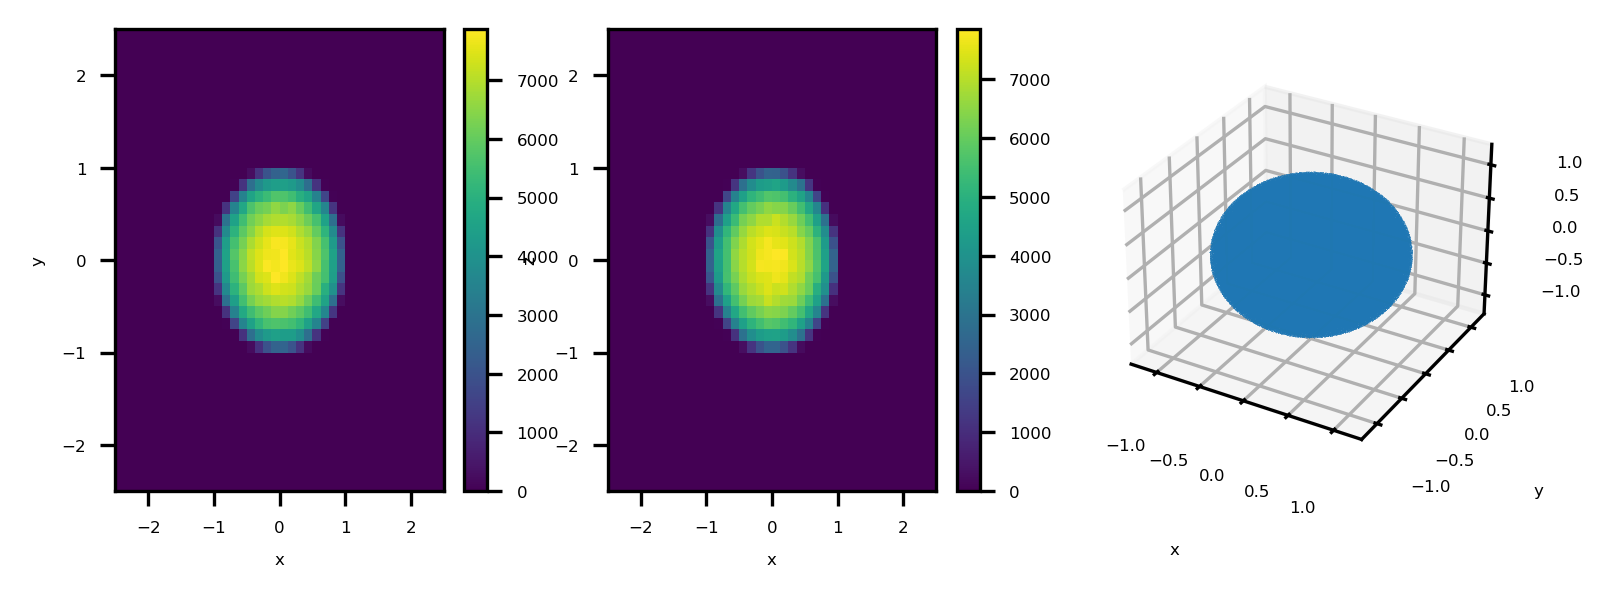

In [2]:
rngseed1=265
rng_key1=random.PRNGKey(rngseed1)
rngseed2=275
rng_key2=random.PRNGKey(rngseed1)

pos=jnp.array([[0,0,0]])

iniX=gen_initX(rng_key1,J=2**20,r=1,pos=pos,plot=True)
T=1.0
dt=5e-4

In [3]:
from mpl_toolkits.mplot3d import Axes3D

output_dir_3d = '3d'
logs_dir = 'logs'
os.makedirs(output_dir_3d, exist_ok=True)
os.makedirs(logs_dir, exist_ok=True)

M0_values = [45.0, 46.0, 47.0, 48.0, 49.0, 50.0]


for M0 in M0_values:
    notebook_name = f'M{M0:.1f}_3D'
    print(f"Processing 3D case: {notebook_name}")
    
    model = PKS(
        rng_key=rng_key2,
        M0=M0,
        H=256,
        L=8,
        eps=1e-4
    )
    
    model.X = iniX
    model.solve(
        t=T,
        t0=dt,
        show_num=200,
        show_flag=False,
        notebook_name=notebook_name
    )

    varlog_np = np.asarray(jnp.stack(model.varlog))
    tlog_np = np.asarray(jnp.stack(model.tlog))
    cmaxlog_np = np.asarray(jnp.stack(model.cmaxlog))


    filename = f"M{M0:.1f}.npz"
    save_path = os.path.join(logs_dir, filename)  
    np.savez(save_path,
             varlog=varlog_np,
             tlog=tlog_np,
             cmaxlog=cmaxlog_np,
             X=model.X)

Processing 3D case: M45.0_3D
--- Build time 0.05859184265136719 s ---
--- Total time 2624.2309334278107 s ---
Processing 3D case: M46.0_3D
--- Build time 0.0 s ---
--- Total time 2765.2535195350647 s ---
Processing 3D case: M47.0_3D
--- Build time 0.006731510162353516 s ---
--- Total time 2727.3779044151306 s ---
Processing 3D case: M48.0_3D
--- Build time 0.015090227127075195 s ---
--- Total time 2732.240308046341 s ---
Processing 3D case: M49.0_3D
--- Build time 0.015624523162841797 s ---
--- Total time 2551.1638007164 s ---
Processing 3D case: M50.0_3D
--- Build time 0.0 s ---
--- Total time 2628.254807949066 s ---
